# Final Project, Predicting Soccer Game Scores
## Rob Taylor
### AI 240 Programming Machine Learning
*Problem* - As a coach, I need to know how to balance my line up through tournaments and games. If I'm playing an easy team, I can start my 2nd string players knowing I will have ample opportunity to put out my starters if needed. If I'm playing a team that scores a lot, I might change my formation to be more defensive. A team that doesn't score much might enable me to be more aggressive.

Know what the predicted outcome of a game is extremely valueable to me as a coach - so I thought I would see how this plays out with AI/ML. These are the world's best known teams. So it isn't like I'm coaching in this situation. But if these results were in the hands of their coaches and managers, they might make decisions based on this data.

*Dataset*  - I got this from GitHub: https://github.com/schochastics/football-data
Football Results Dataset
data/results contains results of 1,237,935 football games in 207 top-tier domestic leagues and 20 international tournaments (UEFA EuroLeague/ChampionsLeague,etc.) from 1888-2023. The data is provided as a parquet file.
# Football Results Dataset

**Location:** `data/results`  
**Size:** 1,237,935 football games  
**Scope:** 207 top-tier domestic leagues and 20 international tournaments  
**Years:** 1888–2023  
**Format:** Parquet file  

---

## What's in my data?

| Variable         | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `home`           | Home team name (not necessarily unique)                                     |
| `away`           | Away team name (not necessarily unique)                                     |
| `date`           | Date of match                                                               |
| `gh`             | Goals for home team (including extra time and penalties)                    |
| `ga`             | Goals for away team (including extra time and penalties)                    |
| `full_time`      | `"F"` = 90 minutes, `"E"` = Extra time, `"P"` = Penalty shoot-out           |
| `competition`    | Country name of league or name of international competition                 |
| `home_ident`     | Unique identifier of home team                                              |
| `away_ident`     | Unique identifier of away team                                              |
| `home_country`   | Country of home team                                                        |
| `away_country`   | Country of away team                                                        |
| `home_code`      | Country code of home team                                                   |
| `away_code`      | Country code of away team                                                   |
| `home_continent` | Continent of home team                                                      |
| `away_continent` | Continent of away team                                                      |
| `continent`      | Continent of competition                                                    |
| `level`          | `"national"` = domestic league, `"international"` = international cup       |

Our Target is: Home & Away Score

The data set includes information about:

The steps you will find in this notebook include:
* Data Exploration: Understanding the dataset and key features.
* Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
* Modeling: Implementing and evaluating machine learning model - Neural Networks using Tensorflow keras
* Evaluation: Evaluate the performance of the model.

# Setup

In [3]:
### Done one time and then commented out:
#!pip install tensorflow

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Training tools for Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression






In [6]:
# Modeling Tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input # using this style to avoid the warnings
from tensorflow.keras.callbacks import EarlyStopping


In [138]:
# Evaluation Tools
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Get the data from CSV

In [9]:
# Load dataset from parquet file - nice that this isn't any different than CSV
df = pd.read_parquet("games.parquet")

# Data Exploration & Data PreProcessing
### Understanding the dataset and key features.
### Load, Describe, Find Info, Top/Bot rows, list any key features
### Plot Charts

### I'll be PreProcessing Data inline as I feel it warrants it.


## Data Exploration
#### Just poking around

In [12]:
df.head()

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,Bolton Wanderers,Derby County,1888-09-08,3,6,F,england,Bolton Wanderers (England),Derby County (England),england,england,ENG,ENG,Europe,Europe,Europe,national
1,Everton FC,Accrington FC,1888-09-08,2,1,F,england,Everton FC (England),Accrington FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national
2,Preston North End,Burnley FC,1888-09-08,5,2,F,england,Preston North End (England),Burnley FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national
3,Stoke City,West Bromwich Albion,1888-09-08,0,2,F,england,Stoke City (England),West Bromwich Albion (England),england,england,ENG,ENG,Europe,Europe,Europe,national
4,Wolverhampton Wanderers,Aston Villa,1888-09-08,1,1,F,england,Wolverhampton Wanderers (England),Aston Villa (England),england,england,ENG,ENG,Europe,Europe,Europe,national


In [13]:
df.tail()

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
1237930,Connahs Quay FC,The New Saints,2023-12-31,0,4,F,wales,Connahs Quay FC (Wales),The New Saints (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national
1237931,Penubont,Pontypridd Town Afc,2023-12-31,1,0,F,wales,Penubont (Wales),Pontypridd Town Afc (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national
1237932,Al Urooba,Samaon,2023-12-31,4,1,F,yemen,Al Urooba (Yemen),Samaon (Yemen),yemen,yemen,YE,YE,Asia,Asia,Asia,national
1237933,Al Ittihad Ibb,Tdamn Hadramawt,2023-12-31,2,5,F,yemen,Al Ittihad Ibb (Yemen),Tdamn Hadramawt (Yemen),yemen,yemen,YE,YE,Asia,Asia,Asia,national
1237934,Zesco United,Napsa Stars FC,2023-12-31,1,0,F,zambia,Zesco United (Zambia),Napsa Stars FC (Zambia),zambia,zambia,ZM,ZM,Africa,Africa,Africa,national


### What do you think?
### My thought at this point is that home/away_ident is redundant. But the data documentation warns that the actual unique identifier is *_indent column. So that would make home and away redundant as well as home/away country
### What about that full time and date? I wonder if time of year does impact say European teams while playing in Africa nations.

In [15]:
# BUT Is home/away_country the same as home/away_code?
subset = df[["home_country", "home_code"]].drop_duplicates()


In [16]:
country_to_code = subset.groupby("home_country")["home_code"].nunique()
print("Max unique codes per home_country:", country_to_code.max())


Max unique codes per home_country: 2


In [17]:
code_to_country = subset.groupby("home_code")["home_country"].nunique()
print("Max unique countries per home_code:", code_to_country.max())


Max unique countries per home_code: 7


## Data PreProcessing - Country and Codes
### Well this is not good. The country maps to more than one code (2)
### And the code maps to more than one country (7)

In [19]:
# Select home/country columns
# Drop duplicate rows within those
# Sort the result by "home_code"
df[["home_code", "home_country"]].drop_duplicates().sort_values("home_code")


,home_code,home_country
1176593,,cabo-verde
411641,,namibia
430736,AD,andorra
482586,AE,united-arab-emirates
829817,AF,afghanistan
...,...,...
162012,YUG,montenegro
478563,ZA,south-africa
585530,ZAN,zanzibar
584862,ZM,zambia


In [20]:
country_to_code = subset.groupby("home_country")["home_code"].nunique()
country_to_code[country_to_code == 2]


home_country
bosnia-herzegovina    2
croatia               2
kosovo                2
macedonia-fyr         2
montenegro            2
serbia                2
slovenia              2
Name: home_code, dtype: int64

In [21]:
code_to_country = subset.groupby("home_code")["home_country"].nunique()
code_to_country[code_to_country == 7]

home_code
YUG    7
Name: home_country, dtype: int64

### OK - I'm not a historian. So I'm a little stuck here.
### So, what we have done is discoverd that Yugoslavia has played soccer as at least 7 other countries. Now they are all classified as YUG. I'm good with this. 

### On the flip side - can I print all the home_country with their conrresponding home_code

In [23]:
df[["home_country", "home_code"]].drop_duplicates().sort_values("home_country")


,home_country,home_code
829817,afghanistan,AF
150705,albania,AL
464451,algeria,DZ
488245,american-samoa,AS
430736,andorra,AD
...,...,...
20185,wales,WAL
585016,yemen,YE
584862,zambia,ZM
585530,zanzibar,ZAN


In [24]:
# Look for countries with more than one unique code
country_to_code = subset.groupby("home_country")["home_code"].nunique()
problem_countries = country_to_code[country_to_code > 1].index

# Show their home_code pairs
df[df["home_country"].isin(problem_countries)][["home_country", "home_code"]].drop_duplicates().sort_values("home_country")


,home_country,home_code
86439,bosnia-herzegovina,YUG
181154,bosnia-herzegovina,BOS
86315,croatia,YUG
116348,croatia,HR
248288,kosovo,YUG
862273,kosovo,XK
95857,macedonia-fyr,YUG
145925,macedonia-fyr,MAC
162012,montenegro,YUG
403689,montenegro,ME


### So, this looks like Yugoslavia is going to be a thorn in my side.
### The old teams were under Yugoslavia, the new ones under their own country. I think that in order to preserve the data and yet provide relevant information to the data model, we could add a column that maps the codes to the modern/current country.

In [26]:
yug_mapping = {
    "bosnia-herzegovina": "BOS",
    "croatia": "HR",
    "kosovo": "XK",
    "macedonia-fyr": "MAC",
    "montenegro": "ME",
    "serbia": "RS",
    "slovenia": "SI"
}

In [27]:
# Create new columns, start with original values
df["clean_home_code"] = df["home_code"]
df["clean_away_code"] = df["away_code"]

# Replace 'YUG' home codes using the country
df.loc[df["home_code"] == "YUG", "clean_home_code"] = df["home_country"].map(yug_mapping)

# Replace 'YUG' away codes using the country
df.loc[df["away_code"] == "YUG", "clean_away_code"] = df["away_country"].map(yug_mapping)


In [28]:
print("YUG in clean_home_code:", (df["clean_home_code"] == "YUG").sum())
print("YUG in clean_away_code:", (df["clean_away_code"] == "YUG").sum())
"YUG" in df["clean_home_code"].unique()  # should return False

print("Please be zeros!!")

YUG in clean_home_code: 0
YUG in clean_away_code: 0
Please be zeros!!


### OK So what we've done:
#### home_code still includes historic codes, including "YUG" (Yugoslavia), in many rows. These are not changed or removed from the original data. This is good — it preserves the historical integrity.
#### Now we have replaced "YUG" with updated country codes (like "BOS", "HR", "XK"...) which let us preserve historical context while adding modern team "Features" 



## More Data Exploration

In [31]:
df.describe()

,gh,ga
count,1.237935e+06,1.237935e+06
mean,1.611417e+00,1.150681e+00
std,1.443697e+00,1.216481e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00
max,2.500000e+01,2.400000e+01


In [32]:
df.shape

(1237935, 19)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237935 entries, 0 to 1237934
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   home             1237575 non-null  object
 1   away             1237568 non-null  object
 2   date             1237935 non-null  object
 3   gh               1237935 non-null  int32 
 4   ga               1237935 non-null  int32 
 5   full_time        1237935 non-null  object
 6   competition      1229433 non-null  object
 7   home_ident       1237935 non-null  object
 8   away_ident       1237935 non-null  object
 9   home_country     1237935 non-null  object
 10  away_country     1237935 non-null  object
 11  home_code        1237935 non-null  object
 12  away_code        1237935 non-null  object
 13  home_continent   1237935 non-null  object
 14  away_continent   1237935 non-null  object
 15  continent        1237935 non-null  object
 16  level            1237935 non-null  o

## Data PreProcessing - Date

In [35]:
# Looks like date is still an object. 
# Let's see if we can fix that 
df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237935 entries, 0 to 1237934
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   home             1237575 non-null  object        
 1   away             1237568 non-null  object        
 2   date             1237935 non-null  datetime64[ns]
 3   gh               1237935 non-null  int32         
 4   ga               1237935 non-null  int32         
 5   full_time        1237935 non-null  object        
 6   competition      1229433 non-null  object        
 7   home_ident       1237935 non-null  object        
 8   away_ident       1237935 non-null  object        
 9   home_country     1237935 non-null  object        
 10  away_country     1237935 non-null  object        
 11  home_code        1237935 non-null  object        
 12  away_code        1237935 non-null  object        
 13  home_continent   1237935 non-null  object        
 14  aw

## More Data Exploration

In [38]:
# Checking for nulls....
df.isna().sum()

home                360
away                367
date                  0
gh                    0
ga                    0
full_time             0
competition        8502
home_ident            0
away_ident            0
home_country          0
away_country          0
home_code             0
away_code             0
home_continent        0
away_continent        0
continent             0
level                 0
clean_home_code       0
clean_away_code       0
dtype: int64

In [39]:
df[df["home"].isna() | df["away"].isna()].head()


,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level,clean_home_code,clean_away_code
461287,Rhayader Town,None,1999-08-21,1,3,F,wales,Rhayader Town (Wales),Llanelli Afc (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national,WAL,WAL
461492,None,Aberystwyth Town,1999-08-24,5,0,F,wales,Llanelli Afc (Wales),Aberystwyth Town (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national,WAL,WAL
461595,Barry Town FC,None,1999-08-27,4,2,F,wales,Barry Town FC (Wales),Llanelli Afc (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national,WAL,WAL
462009,None,Bangor City,1999-09-04,4,1,F,wales,Llanelli Afc (Wales),Bangor City (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national,WAL,WAL
462338,Cwmbran Town,None,1999-09-11,3,1,F,wales,Cwmbran Town (Wales),Llanelli Afc (Wales),wales,wales,WAL,WAL,Europe,Europe,Europe,national,WAL,WAL


## Data PreProcessing - Competition, Home & Away Columns
### Alright, so we have "None" in the home/away columns
### but we can clearly see the team in the corresponding home/away_identifier column
## SO
### we can copy it directly into the corresponding home/away which would be nice and easy
## OR
### we can create a temp column to store the name without the (country) and then copy just the name to the home/away column, then remove the temp column just because I love to make my life harder...

In [41]:
# Clean the ident fields first (strip anything after the first '(' and trim whitespace)
df["home_ident_temp"] = df["home_ident"].str.replace(r"\s*\(.*\)", "", regex=True)
df["away_ident_temp"] = df["away_ident"].str.replace(r"\s*\(.*\)", "", regex=True)

#So - things like "Llanellie Afc (Wales)" are now just "Llanellie Afc"

In [42]:
# Apparently Pandas won't let you use replace from one column to the next - so you have to do the fillna in two steps!!!
df["home"] = df["home"].replace("None", np.nan)
df["away"] = df["away"].replace("None", np.nan)


In [43]:
# Fill the names with the temp column
df["home"] = df["home"].fillna(df["home_ident_temp"])
df["away"] = df["away"].fillna(df["away_ident_temp"])


In [44]:
# If it worked, then these should be empty
# and since I'm about to destroy the evidence, this is the last time you will see the temp columns
df[df["home"].isna() | df["away"].isna()].head()


,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,...,home_code,away_code,home_continent,away_continent,continent,level,clean_home_code,clean_away_code,home_ident_temp,away_ident_temp


In [45]:
# Destroy the evidence
df.drop(columns=["home_ident_temp", "away_ident_temp"], inplace=True)


### Awesome. Now to deal with Competitions column

In [47]:
print("unique:", df["competition"].unique())

unique: ['england' 'scotland' 'belgium' 'argentina' 'denmark' 'hungary'
 'switzerland' 'sweden' 'spain' 'italy' 'uruguay' 'france' 'portugal'
 'ddr' 'romania' 'Copa Sud' 'austria' 'germany' 'norway' 'bulgaria'
 'UEFA EL' 'iceland' 'UEFA CL' 'netherlands' 'turkey' 'Copa Lib' 'poland'
 'UEFA SC' None 'brazil' 'tunisia' 'ireland-republic' 'mexico' 'OFC CC'
 'greece' 'morocco' 'Recopa' 'CONCACAF CC' 'georgia' 'korea-republic'
 'lithuania' 'slovenia' 'croatia' 'ukraine' 'uzbekistan' 'russia'
 'belarus' 'moldova' 'CAF SC' 'japan' 'czech-republic' 'china-pr'
 'finland' 'northern-ireland' 'ecuador' 'bolivia' 'peru' 'malta'
 'UEFA ITC' 'colombia' 'israel' 'united-states' 'latvia'
 'serbia-and-montenegro' 'venezuela' 'honduras' 'cyprus' 'CFU CC'
 'macedonia-fyr' 'albania' 'faroe-islands' 'estonia' 'wales' 'india'
 'kazakhstan' 'slovakia' 'egypt' 'el-salvador' 'san-marino' 'andorra'
 'algeria' 'kuwait' 'Fifa Club' 'cameroon' 'cote-divoire' 'burkina-faso'
 'bosnia-herzegovina' 'azerbaijan' 'singap

In [48]:
df[df["competition"].isna()].sample(5)


,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level,clean_home_code,clean_away_code
924779,Socceroo,Ceres,2015-04-21,0,4,F,None,Socceroo (Philippines),Ceres (Philippines),philippines,philippines,PH,PH,Asia,Asia,Asia,national,PH,PH
304833,Footscray Just,South Melbourne FC,1984-07-15,1,2,F,None,Footscray Just (Australia),South Melbourne FC (Australia),australia,australia,AU,AU,Oceania,Oceania,Oceania,national,AU,AU
297645,Brisbane City FC,Footscray Just,1983-09-04,0,1,F,None,Brisbane City FC (Australia),Footscray Just (Australia),australia,australia,AU,AU,Oceania,Oceania,Oceania,national,AU,AU
375017,Adelaide City FC,Wollongong Wolves,1992-11-01,0,0,F,None,Adelaide City FC (Australia),Wollongong Wolves (Australia),australia,australia,AU,AU,Oceania,Oceania,Oceania,national,AU,AU
399089,Gippsland Falcons,Adelaide City FC,1995-03-08,1,2,F,None,Gippsland Falcons (Australia),Adelaide City FC (Australia),australia,australia,AU,AU,Oceania,Oceania,Oceania,national,AU,AU


In [49]:
## Let's try to plot this for clarity
missing_comp = df[df["competition"].isna()]
missing_comp.loc[:, "decade"] = (missing_comp["date"].dt.year // 10) * 10


C:\Users\robta\AppData\Local\Temp\ipykernel_8508\3833818789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_comp.loc[:, "decade"] = (missing_comp["date"].dt.year // 10) * 10


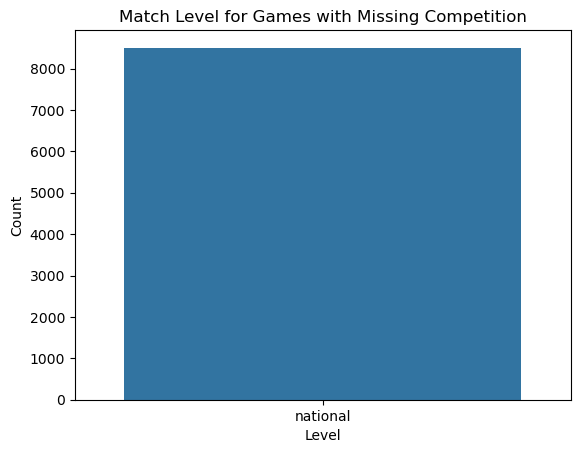

In [50]:
# Let's look at level.
sns.countplot(data=missing_comp, x="level")
plt.title("Match Level for Games with Missing Competition")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()


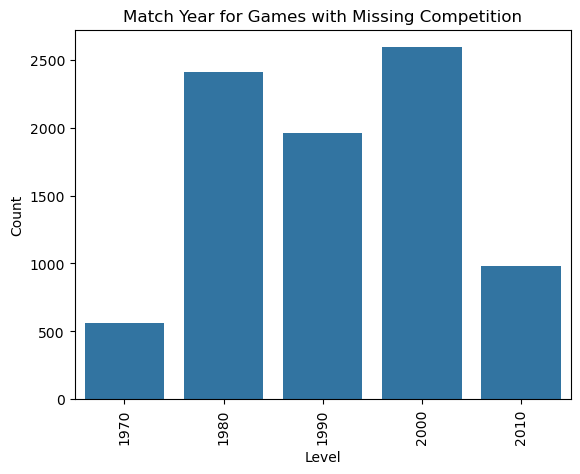

In [51]:
## not very useful... 

# Year, just to see
sns.countplot(data=missing_comp, x="decade")
plt.title("Match Year for Games with Missing Competition")
plt.xlabel("Level")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.show()


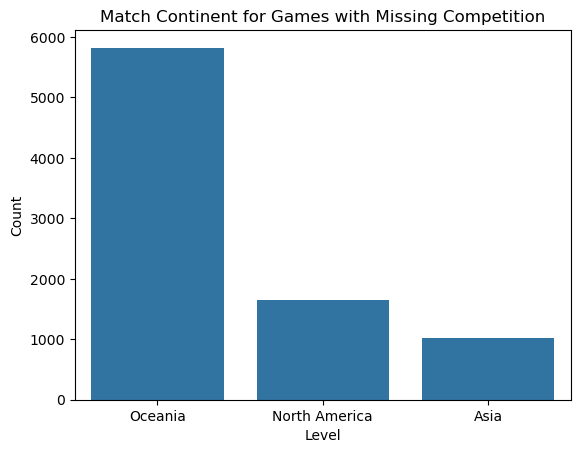

In [52]:
## OK - this is in the hundreds and spans 40 years.

# And Continent
sns.countplot(data=missing_comp, x="continent")
plt.title("Match Continent for Games with Missing Competition")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()


In [53]:
## That's interesting. Wonder if they are cross continent or just in their own continent.
missing_comp = df[df["competition"].isna()]

In [54]:
# See if they are NOT equal. NOT EQUAL means TRUE - Cross Continental
missing_comp.loc[:, "cross_continental"] = missing_comp["home_continent"] != missing_comp["away_continent"]


C:\Users\robta\AppData\Local\Temp\ipykernel_8508\283927098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_comp.loc[:, "cross_continental"] = missing_comp["home_continent"] != missing_comp["away_continent"]


In [55]:
missing_comp["cross_continental"].value_counts()

cross_continental
False    8502
Name: count, dtype: int64

### So, they are all local to their continent. Humph. 
#### Since this is spread across three continents and spans nearly 40 years. And since the numer isn't small, it's just unlabeled, I'm going to choose to label the competition level_continent

In [57]:
# here we go... 
df["competition"] = df["competition"].fillna(df["level"] + "_" + df["continent"])

In [58]:
# REChecking for nulls....
df.isna().sum()

home               0
away               0
date               0
gh                 0
ga                 0
full_time          0
competition        0
home_ident         0
away_ident         0
home_country       0
away_country       0
home_code          0
away_code          0
home_continent     0
away_continent     0
continent          0
level              0
clean_home_code    0
clean_away_code    0
dtype: int64

### It is hard to know if you should go all hot mess (one hot encoding) on this column since it has over a hundred values. I'm going to make that decision when I need to. 

## Data Exploration with plots...

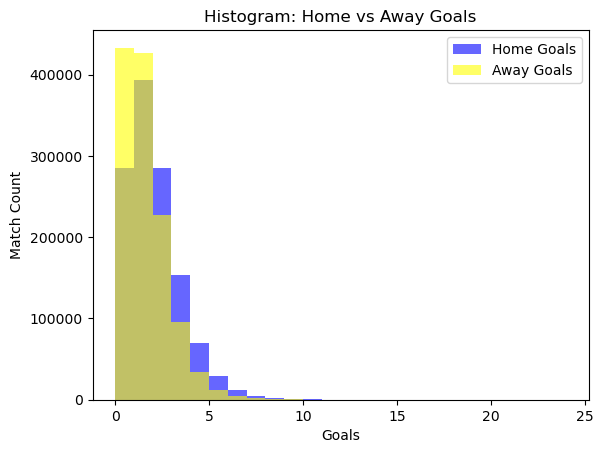

In [61]:
# OK - there is some match in the mix that had like 25 goals. It reallly messes with the chart. 
plt.hist(df["gh"], bins=range(0, 25), alpha=0.6, label="Home Goals", color='blue')
plt.hist(df["ga"], bins=range(0, 25), alpha=0.6, label="Away Goals", color='yellow')
plt.title("Histogram: Home vs Away Goals")
plt.xlabel("Goals")
plt.ylabel("Match Count")
plt.legend()
plt.show()


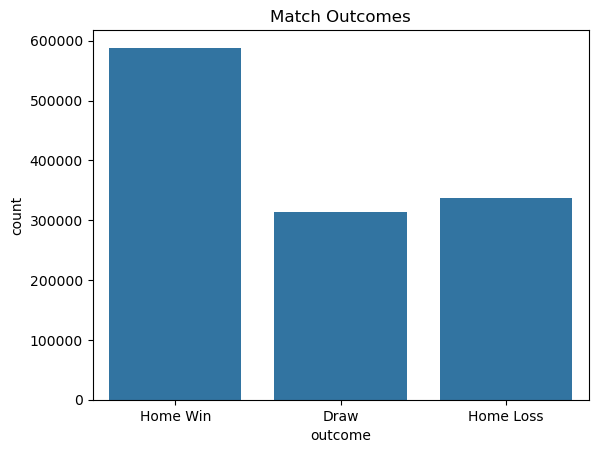

In [154]:
df["outcome"] = df.apply(
    lambda row: "Home Win" if row.gh > row.ga else "Home Loss" if row.ga > row.gh else "Draw", axis=1
)

sns.countplot(data=df, x="outcome", order=["Home Win", "Draw", "Home Loss"])
plt.title("Match Outcomes")
plt.show()

In [63]:
# I went through the trouble of adding the result of the game, maybe I use it, maybe I don't
# df.drop(columns=["outcome"], inplace=True) # destroy the evidence

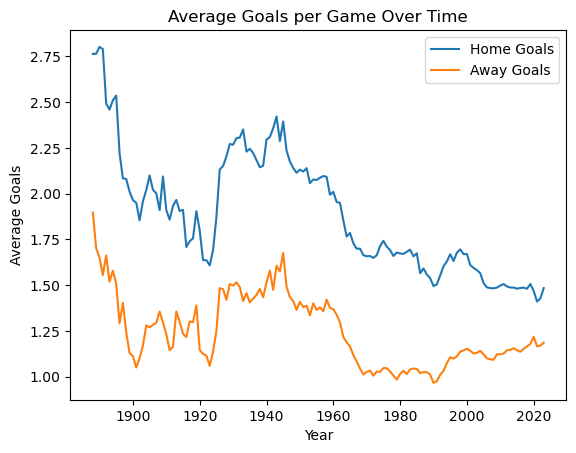

In [64]:
df["match_year"] = df["date"].dt.year
yearly_avg = df.groupby("match_year")[["gh", "ga"]].mean().reset_index()

plt.plot(yearly_avg["match_year"], yearly_avg["gh"], label="Home Goals")
plt.plot(yearly_avg["match_year"], yearly_avg["ga"], label="Away Goals")
plt.title("Average Goals per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.legend()
plt.show()


### Well, it looks like it is pretty hard to get results on the road. 
#### In the first chart, away goals is fewer (has more) and home goals is greater than away goals for higher values.
#### In the second chart, this is more clear.

### This is interesting in that goals scored is on the rise. 
#### The trouble with soccer is they want more goals, but it is increasingly hard to score as defenses and goalies get better. So they change the rules (like offsides) and we see little bumps in the graph. Still, this is a good graph to show how hard it is to score when you are the away team.

### I want to collect more date information for future use

In [68]:
# Extract match date information 
df['match_month'] = df['date'].dt.month
df['match_day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6
df['match_day_of_year'] = df['date'].dt.dayofyear
df['match_week_of_year'] = df['date'].dt.isocalendar().week.astype(int) # Using isocalendar for week number
df['match_quarter'] = df['date'].dt.quarter
df['match_ordinal_date'] = df['date'].dt.date.apply(lambda x: x.toordinal()) # Julian day number - continuous time

df.head(10)

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,...,clean_home_code,clean_away_code,outcome,match_year,match_month,match_day_of_week,match_day_of_year,match_week_of_year,match_quarter,match_ordinal_date
0,Bolton Wanderers,Derby County,1888-09-08,3,6,F,england,Bolton Wanderers (England),Derby County (England),england,...,ENG,ENG,Home Loss,1888,9,5,252,36,3,689464
1,Everton FC,Accrington FC,1888-09-08,2,1,F,england,Everton FC (England),Accrington FC (England),england,...,ENG,ENG,Home Win,1888,9,5,252,36,3,689464
2,Preston North End,Burnley FC,1888-09-08,5,2,F,england,Preston North End (England),Burnley FC (England),england,...,ENG,ENG,Home Win,1888,9,5,252,36,3,689464
3,Stoke City,West Bromwich Albion,1888-09-08,0,2,F,england,Stoke City (England),West Bromwich Albion (England),england,...,ENG,ENG,Home Loss,1888,9,5,252,36,3,689464
4,Wolverhampton Wanderers,Aston Villa,1888-09-08,1,1,F,england,Wolverhampton Wanderers (England),Aston Villa (England),england,...,ENG,ENG,Draw,1888,9,5,252,36,3,689464
5,Aston Villa,Stoke City,1888-09-15,5,1,F,england,Aston Villa (England),Stoke City (England),england,...,ENG,ENG,Home Win,1888,9,5,259,37,3,689471
6,Blackburn Rovers,Accrington FC,1888-09-15,5,5,F,england,Blackburn Rovers (England),Accrington FC (England),england,...,ENG,ENG,Draw,1888,9,5,259,37,3,689471
7,Bolton Wanderers,Burnley FC,1888-09-15,3,4,F,england,Bolton Wanderers (England),Burnley FC (England),england,...,ENG,ENG,Home Loss,1888,9,5,259,37,3,689471
8,Derby County,West Bromwich Albion,1888-09-15,1,2,F,england,Derby County (England),West Bromwich Albion (England),england,...,ENG,ENG,Home Loss,1888,9,5,259,37,3,689471
9,Everton FC,Notts County,1888-09-15,2,1,F,england,Everton FC (England),Notts County (England),england,...,ENG,ENG,Home Win,1888,9,5,259,37,3,689471


### Not gonna lie. I was suspect of the dates from 1888, but these teams formed as early as 1877. SO, we'll trust it.

### No need to show Fulltime - there are like a million and it skews the chart

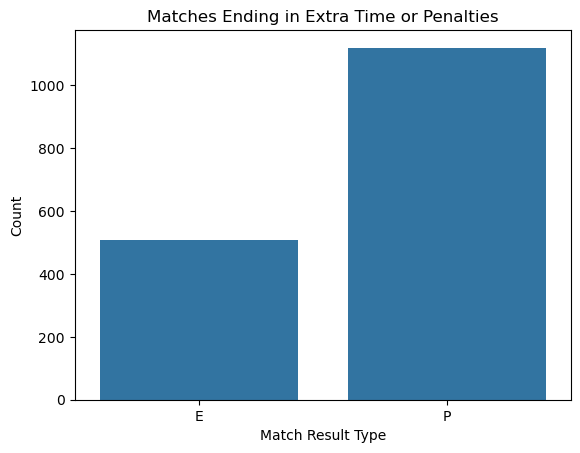

In [71]:
# There are over a million rows. The full_time "F" doesn't need to be shown. Filter those out.
df_et_pen = df[df["full_time"].isin(["E", "P"])]

# Count plot of extra-time and penalties only 
sns.countplot(data=df_et_pen, x="full_time")
plt.title("Matches Ending in Extra Time or Penalties")
plt.xlabel("Match Result Type")
plt.ylabel("Count")
plt.show()


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237935 entries, 0 to 1237934
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   home                1237935 non-null  object        
 1   away                1237935 non-null  object        
 2   date                1237935 non-null  datetime64[ns]
 3   gh                  1237935 non-null  int32         
 4   ga                  1237935 non-null  int32         
 5   full_time           1237935 non-null  object        
 6   competition         1237935 non-null  object        
 7   home_ident          1237935 non-null  object        
 8   away_ident          1237935 non-null  object        
 9   home_country        1237935 non-null  object        
 10  away_country        1237935 non-null  object        
 11  home_code           1237935 non-null  object        
 12  away_code           1237935 non-null  object        
 13  home_contine

## Data Exploration
### I think we can make some of these binary to help with processing.

In [74]:
print("unique:", df["full_time"].unique())
print("unique:", df["continent"].unique())
print("unique:", df["level"].unique())
print("unique:", df["outcome"].unique())

unique: ['F' 'E' 'P']
unique: ['Europe' 'South America' 'world' 'Oceania' 'Africa' 'North America'
 'Asia']
unique: ['national' 'international']
unique: ['Home Loss' 'Home Win' 'Draw']


## Data PreProcessing - full_time, continent, outcome, and home/away_teams level

In [76]:
# Let's encode full_time to full_time_F/E/P using one hot encoding
dummies = pd.get_dummies(df["full_time"], prefix="full_time")
df = pd.concat([df, dummies], axis=1)


In [77]:
# Saem with outcome (since there are only 3)
outcome_encoder = LabelEncoder()
df["outcome_encoded"] = outcome_encoder.fit_transform(df["outcome"])

### home_team and away_team are tricky. 
#### There are hundreds of teams. We can't use One Hot encoding because this would add hundreds of teams. But using le means the AI might infer some significance in the sequential number assigned to the team. 

In [79]:
# doing home team and then adding any awya teams that weren't in the home team side.
team_encoder = LabelEncoder()
df["home_team_encoded"] = team_encoder.fit_transform(df["clean_home_code"])
df["away_team_encoded"] = team_encoder.transform(df["clean_away_code"])  # use .transform only because otherwise it overwrites
                                                                         # what it just learned  with home team. 


In [80]:
# same with home/away country. 
country_encoded = LabelEncoder()
df["home_country_encoded"] = country_encoded.fit_transform(df["home_country"])
df["away_country_encoded"] = country_encoded.transform(df["away_country"])

In [81]:
# Let's use labelEncoder to transform continent (since there are only 7)
# but there are three continent fields. In theory all continents are represented in each set, but we really don't know
# So if it’s missing a continent that appears in away/home_continent, then we get a KeyError when transforming.

le_continent = LabelEncoder()

# Fit on all continent-related columns together to avoid missing any unseen values
all_continents = pd.concat([
    df["continent"],
    df["home_continent"],
    df["away_continent"]
]).dropna().unique()

le_continent.fit(all_continents)

# SO, if i understand what just happened, we used all three columns to do the fit. Now we can just do the transform:
df["continent_encoded"] = le_continent.transform(df["continent"])
df["home_cont_encoded"] = le_continent.transform(df["home_continent"])
df["away_cont_encoded"] = le_continent.transform(df["away_continent"])


In [82]:
# Let's make level something more clear like is_international
df["is_international"] = (df["level"] == "international").astype(int)


In [83]:
competition_encoded = LabelEncoder()
df["competition_encoded"] = competition_encoded.fit_transform(df["competition"])


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237935 entries, 0 to 1237934
Data columns (total 40 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   home                  1237935 non-null  object        
 1   away                  1237935 non-null  object        
 2   date                  1237935 non-null  datetime64[ns]
 3   gh                    1237935 non-null  int32         
 4   ga                    1237935 non-null  int32         
 5   full_time             1237935 non-null  object        
 6   competition           1237935 non-null  object        
 7   home_ident            1237935 non-null  object        
 8   away_ident            1237935 non-null  object        
 9   home_country          1237935 non-null  object        
 10  away_country          1237935 non-null  object        
 11  home_code             1237935 non-null  object        
 12  away_code             1237935 non-null  ob

## Thoughts

#### Well, I put a lot of time into the full_time E/F/P (Full 90, Extra Time, and Penalties). But then I discovered I tipped my hand too soon to the model. That is, ET or PKs being TRUE indicates information that we don't know when the game starts. So it would likely be horrible at actual predictions. This is called <b>data leakage</b>. So I'm not going to use it. UGH!


# Modeling 1 Just Predicting Win/Loss/Draw for the home team
### Just trying to frame everything from the home team perspective.

In [87]:
features = [
    "home_team_encoded", "away_team_encoded",
    "match_year", "match_month", "match_day_of_week", "match_week_of_year", "match_quarter",
    "continent_encoded", "home_cont_encoded", "away_cont_encoded", 
    "is_international",
    "competition_encoded"
]
# target = ["outcome_encoded"] setting a target variable throws a warning... so I just put the one column in the y variable.

In [88]:
X = df[features]
y = df["outcome_encoded"]
# Split data (80% training, 20% testing) using the ultimate question of life, the universe and everything (like we've been doing all year)
# BTW - if you don't know why you see the number 42 in a lot of programming, you need to read the Hitchhiker's Guide to the Galaxy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression

In [90]:
# First time I ran this, it took forever and "failed to converge"
# So this time I'm trying to scale it down a bit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [92]:
y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=outcome_encoder.classes_))

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00     62590
   Home Loss       0.00      0.00      0.00     67342
    Home Win       0.48      1.00      0.64    117655

    accuracy                           0.48    247587
   macro avg       0.16      0.33      0.21    247587
weighted avg       0.23      0.48      0.31    247587



C:\Users\robta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\robta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\robta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### OK - so it looks like it is just predicting home wins since that is almost 2:1 over anything else. you'll be 
#### right 50% of the time and that is as good as it can get. I'm going to try to balance that out.

In [94]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42 )
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [95]:
y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=outcome_encoder.classes_))

              precision    recall  f1-score   support

        Draw       0.26      0.26      0.26     62590
   Home Loss       0.29      0.44      0.35     67342
    Home Win       0.51      0.36      0.42    117655

    accuracy                           0.36    247587
   macro avg       0.36      0.35      0.35    247587
weighted avg       0.39      0.36      0.36    247587



#### WOW That looks a lot better!

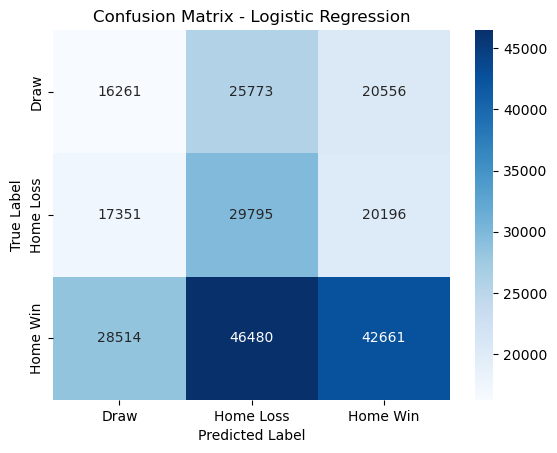

In [97]:
# Let's try a confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=outcome_encoder.classes_,yticklabels=outcome_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Let's try again with Random Forest Classifier

## Random Forest Classifier

In [100]:
# We are going to try some different classifiers and see the result
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

        Draw       0.27      0.22      0.24     62590
   Home Loss       0.31      0.26      0.28     67342
    Home Win       0.49      0.58      0.53    117655

    accuracy                           0.40    247587
   macro avg       0.35      0.35      0.35    247587
weighted avg       0.38      0.40      0.39    247587



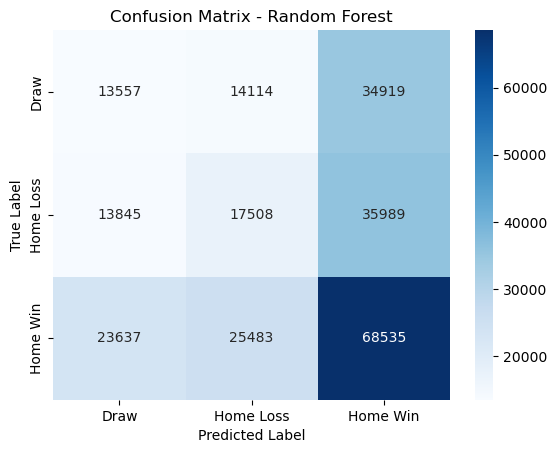

In [101]:
y_pred = rf.predict(X_test)

# Print report
print(classification_report(y_test, y_pred, target_names=outcome_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=outcome_encoder.classes_, yticklabels=outcome_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## What can we conclude from these?


| Metric           | Logistic Regression | Random Forest |
| ---------------- | ------------------- | ------------- |
| Accuracy         | ❌ 31%               | ✅ 40%         |
| Home Win Recall  | ❌ 5%                | ✅ 58%         |
| Home Loss Recall | ✅ 73%               | ❌ 26%         |
| Draw Recall      | ❌ 24%               | ✅ 22% (close) |
| Overall Macro F1 | ❌ 0.26              | ✅ 0.35        |


#### Let's deal with home wins since this happens the most.
Precision: of hte Home wins identified, how many were actually home wins?
* Winner: Logistic Regression (.50 vs .49 - by less than 1%) 

Recall: Of all the home wins, how many were identified?
* Winner: Random Forest (58% vs 5%)
* Note, Logistic Regression crushed the Home Loss recall with 73%

Accuracy: Of all the win/loss/draws, how many overall were correctly classified.
* Winner: Random Forest (40% vs 31%)

F1 Score: This is the balance of getting it right and not wrong.
* Winner: Random Forest (.35 vs .26)

## Conclusion - well, at least what I would say
Random Forest did "significantly" better in all areas except home losses. But neither makes me want to go out and place bets on a team.


### OK - with something as easy as Win Loss Draw, our best (first shot/10th shot) was 40% 
Now let's go hog wild and try to predict scores!!! they gave us the goals home and goals away. Let's do it!

# Modeling 2 Let's Guess the Scores! 
### The big difference is that above we are doing a classification problem with three outputs. Now we are doing a multi-target regression problem. 

In [108]:
# Same Features
features = [
    "home_team_encoded", "away_team_encoded",
    "match_year", "match_month", "match_day_of_week",
    "match_week_of_year", "match_quarter",
    "continent_encoded", "home_cont_encoded", "away_cont_encoded",
    "is_international", "competition_encoded"
]

# New Targets
X = df[features]
y = df[["gh", "ga"]]  # Goals Home and Goals Away


## Train Split

In [110]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Try scaling like we did before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [112]:
# Using RandomForest but this time as a regression problem and not a classification problem.
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

### That ran even longer than the linear regression above

## Predict and Evaluation
#### Again, I'm an idiot for making this harder than it has to be. I really am out of my depth

In [115]:
y_pred = regressor.predict(X_test_scaled)

mse_home = mean_squared_error(y_test["gh"], y_pred[:, 0])
mse_away = mean_squared_error(y_test["ga"], y_pred[:, 1])

mae_home = mean_absolute_error(y_test["gh"], y_pred[:, 0])
mae_away = mean_absolute_error(y_test["ga"], y_pred[:, 1])

print(f"Home Goals - MSE: {mse_home:.2f}, MAE: {mae_home:.2f}")
print(f"Away Goals - MSE: {mse_away:.2f}, MAE: {mae_away:.2f}")


Home Goals - MSE: 2.44, MAE: 1.20
Away Goals - MSE: 1.76, MAE: 1.01


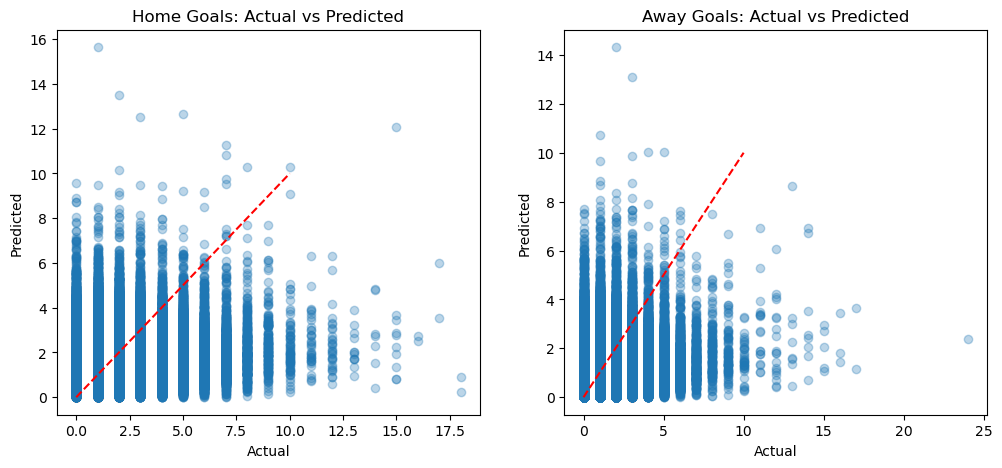

In [116]:
## This is OK - but what does it look like visually?
plt.figure(figsize=(12, 5))

# Home goals
plt.subplot(1, 2, 1)
plt.scatter(y_test["gh"], y_pred[:, 0], alpha=0.3)
plt.plot([0, 10], [0, 10], 'r--')
plt.title("Home Goals: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Away goals
plt.subplot(1, 2, 2)
plt.scatter(y_test["ga"], y_pred[:, 1], alpha=0.3)
plt.plot([0, 10], [0, 10], 'r--')
plt.title("Away Goals: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()


## How about some actual data
OK - so y_test is the actual values with home/away goals (gh, ga)
y_pred is the predicted values. Can we see how this may have played out?
Try to combine the two and see what we get:

In [118]:
# Combine predicted and actual values
results_df = pd.DataFrame({
    "Actual_Home_Goals": y_test["gh"].values,
    "Predicted_Home_Goals": y_pred[:, 0].round(2),
    "Actual_Away_Goals": y_test["ga"].values,
    "Predicted_Away_Goals": y_pred[:, 1].round(2)
})

# Show a sample of 10 rows
results_df.sample(10, random_state=42)

,Actual_Home_Goals,Predicted_Home_Goals,Actual_Away_Goals,Predicted_Away_Goals
121150,4,1.25,1,1.75
3206,9,7.68,0,0.94
140491,1,0.46,1,0.94
176569,3,1.76,0,1.33
95308,4,2.21,1,0.17
41170,0,2.06,0,1.02
141838,1,1.20,0,1.62
107120,3,2.28,2,1.61
99145,0,0.68,0,0.42
69655,5,7.52,0,1.21


## Well that begs a new question.... how often are we right?
Again, I'm way out of my depth. This feels like bonus material, but now I really want to know.

## My plan is to categorize the scores by win/loss/draw
## The first thing I realized is rounding (you can't score 1.25 goals)
So, I'm wondering how can I round. Then I thought, what if it is better using floor or ceiling? Why not use all three. Then I'm asking, how do you reuse code? 

They say when you find yourself in a hole, <b>stop digging!</b> But, I'm not the sharpest tool in the shed.

In [121]:
# Let's create a function that we can reuse!! 
# The programmer in me is so excited it feels like I just slammed 2 monster drinks.
def get_outcomes_from_goals(pred_goals):
    outcomes = []
    for gh, ga in pred_goals:
        if gh > ga:
            outcomes.append("Home Win")
        elif gh < ga:
            outcomes.append("Home Loss")
        else:
            outcomes.append("Draw")
    return outcomes


In [122]:
# Now we have do try round/floor/celiing
rounded = np.round(y_pred).astype(int)
floored = np.floor(y_pred).astype(int)
ceiling = np.ceil(y_pred).astype(int)

# CALL THE OUTCOME FUNCTION - WOOT WOOT!! 
outcomes_rounded = get_outcomes_from_goals(rounded)
outcomes_floored = get_outcomes_from_goals(floored)
outcomes_ceiling = get_outcomes_from_goals(ceiling)


In [125]:
# Get the actual outcomes from y_test
actual_outcomes = df.loc[y_test.index, "outcome"]


In [127]:
# Compare our results!!
print("================== Rounded Predictions ==================\n")
print(classification_report(actual_outcomes, outcomes_rounded))

print("================== Floored Predictions ==================\n")
print(classification_report(actual_outcomes, outcomes_floored))

print("================== Ceiling Predictions ==================\n")
print(classification_report(actual_outcomes, outcomes_ceiling))


================== Rounded Predictions ==================

              precision    recall  f1-score   support

        Draw       0.26      0.38      0.31     62556
   Home Loss       0.32      0.18      0.23     67555
    Home Win       0.50      0.50      0.50    117476

    accuracy                           0.38    247587
   macro avg       0.36      0.35      0.35    247587
weighted avg       0.39      0.38      0.38    247587

================== Floored Predictions ==================

              precision    recall  f1-score   support

        Draw       0.26      0.37      0.30     62556
   Home Loss       0.32      0.18      0.23     67555
    Home Win       0.50      0.51      0.50    117476

    accuracy                           0.38    247587
   macro avg       0.36      0.35      0.34    247587
weighted avg       0.39      0.38      0.38    247587

================== Ceiling Predictions ==================

              precision    recall  f1-score   support

      

In [136]:
summary = pd.DataFrame({
    "Method": ["Rounded", "Floored", "Ceiling"],
    "Accuracy": [
        accuracy_score(actual_outcomes, outcomes_rounded),
        accuracy_score(actual_outcomes, outcomes_floored),
        accuracy_score(actual_outcomes, outcomes_ceiling)
    ]
})

print("\nOutcome Prediction Accuracy by Rounding Strategy:")
print(summary.sort_values(by="Accuracy", ascending=False))


Outcome Prediction Accuracy by Rounding Strategy:
    Method  Accuracy
0  Rounded  0.382536
2  Ceiling  0.382278
1  Floored  0.382225


## all the air just went out of my balloon.


<b>Rounded</b> Wins for best recall on Draw (38%) - meaning it captured more draws than the other two.
<b>Floor & Ceiling</b> Win for best recall on Home Wins (51%) - meaning more actual wins were captured. These two were essentially the same. But I like that they got more wins!!

Comparing to the previous two methods of categorization. 

# Overall Evaluation
I gotta finish somewhere
Reminders:
| Metric        | Meaning (per class)                                          |
| ------------- | ------------------------------------------------------------ |
| **Precision** | When the model predicts (a win loss draw), how often is it correct? |
| **Recall**    | Of all true instances of a result, how many did we find?   |
| **F1-Score**  | the balance between precision and recall  |
| **Support**   | How many true examples there are of this class (think confusion matrix output) |

## Summary 
| Method                   | Accuracy  | Draw Recall   | Home Loss Recall | Home Win Recall | Best At                |
| ------------------------ | --------- | ------------- | ---------------- | --------------- | ---------------------- |
| Logistic Regression      | **\~31%** | Low           | High             | Very Low        | Predicting Losses only |
| Random Forest Classifier | **\~40%** | Moderate      | Moderate         | Best (\~58%)    | Home Wins              |
| Regression + Round       | **\~38%** | Best          | Low              | Decent (\~50%)  | Balanced               |
| Regression + Floor       | **\~38%** | Lower         | Low              | Good (\~51%)    | Home Wins              |
| Regression + Ceil        | **\~38%** | Lower         | Low              | Good (\~51%)    | Home Wins              |


|  # | Method                       | Type                         | Accuracy | Notes                                               |
| -: | ---------------------------- | ---------------------------- | -------- | --------------------------------------------------- |
|  1 | **Logistic Regression**      | Classification               | \~31%    | Low recall on **Home Win**, performs worst overall  |
|  2 | **Random Forest Classifier** | Classification               | \~40%    | Best accuracy so far, solid **Home Win** prediction |
|  3 | **Regression → Rounded**     | Regression-to-Classification | \~38%    | Best for **Draws**, very close to Random Forest     |
|  4 | **Regression → Floor**       | Regression-to-Classification | \~38%    | Slightly higher **Home Win** recall                 |
|  5 | **Regression → Ceil**        | Regression-to-Classification | \~38%    | Essentially same as floor; no unique advantage      |


### Final thoughts
<b>Random Forest Classifier wins on pure accuracy</b> — likely because "when in doubt, go with a home win' But more seriously, it just does better with the feature interactions.

<b>Regression</b>-based methods are surprisingly close in performance despite being designed to predict exact scores, not categories.

<b>Logistic Regression underperforms</b> — especially on predicting Home Wins — suggesting the classes aren’t linear - seems obvious - but we did it anyway...